In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp
from numpy.random import seed
seed(1)
from math import sqrt
import pandas as pd
import keras
import scipy as sp
from scipy import stats
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import InputLayer
from keras import initializers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving simulation.xlsx to simulation.xlsx


In [3]:
df=pd.read_excel('simulation.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [5]:
#df = pd.read_excel('/content/gdrive/My Drive/PhD with Dr Anahita/projects/chatter/simulation.xlsx')
df.columns = ['A_Mpa','B_Mpa','C','N','M','FC','H','B','FT','FN','P','T']
#df.head(43)
#df.describe()

In [ ]:
# to generate 30 inputs randomly
A_30_random=np.random.uniform(164.000000	,378.633259,30)
B_30_random=np.random.uniform(17.871447 ,211.000000	, 30)
c_30_random=np.random.uniform(0.001000	, 0.041100		, 30)
n_30_random=np.random.uniform(0.084000	, 0.660633		, 30)
m_30_random=np.random.uniform(0.823872		, 1.583963		, 30)
h_30_random=np.random.uniform(0.130000	, 0.170000		, 30)
random_data=np.hstack((A_30_random.reshape(30,1),B_30_random.reshape(30,1),c_30_random.reshape(30,1),n_30_random.reshape(30,1),m_30_random.reshape(30,1),h_30_random.reshape(30,1)))
df_random_30=pd.DataFrame(random_data, columns=['A_Mpa','B_Mpa','C','N','M','H'])
df_random_30_from_original=df.sample(n=30)
print('mape_a:', np.mean(abs((df_random_30_from_original['A_Mpa'].to_numpy()-df_random_30['A_Mpa'].to_numpy())/df_random_30_from_original['A_Mpa'].to_numpy())))
print('mape_b:', np.mean(abs((df_random_30_from_original['B_Mpa'].to_numpy()-df_random_30['B_Mpa'].to_numpy())/df_random_30_from_original['B_Mpa'].to_numpy())))
print('mape_c:', np.mean(abs((df_random_30_from_original['C'].to_numpy()-df_random_30['C'].to_numpy())/df_random_30_from_original['C'].to_numpy())))
print('mape_n:', np.mean(abs((df_random_30_from_original['N'].to_numpy()-df_random_30['N'].to_numpy())/df_random_30_from_original['N'].to_numpy())))
print('mape_m:', np.mean(abs((df_random_30_from_original['M'].to_numpy()-df_random_30['M'].to_numpy())/df_random_30_from_original['M'].to_numpy())))
print('mape_h:', np.mean(abs((df_random_30_from_original['H'].to_numpy()-df_random_30['H'].to_numpy())/df_random_30_from_original['H'].to_numpy())))

mape_a: 0.2015115618433375
mape_b: 0.6258659209046296
mape_c: 2.058138896394659
mape_n: 0.4084045074793465
mape_m: 0.162094732835962
mape_h: 0.11825661555415912


In [ ]:
#loading input variables with 1%, 5% and 15% deviation
#df_01_05_15_results = pd.read_excel('/content/gdrive/My Drive/PhD with Dr Anahita/projects/chatter/df_01_05_15_results.xlsx')
#df_01_05_15_results.columns = ['A_Mpa','B_Mpa','C','N','M','H','FT','FN','P','T']
#df_01_05_15_results.head(50)
#df_01_05_15_results_inputs=df_01_05_15_results[['A_Mpa','B_Mpa','C','N','M','H']]
#df_01_05_15_results_outputs=df_01_05_15_results[['FT','FN','P','T']]
#below is scaled against the full dataset. df_01_05_15_results_inputs_scaled1 is scaled against this dataset. Please learn more about this. 
#df_01_05_15_results_inputs_scaled=scaler_x.transform(df1)
#df_01_05_15_results_outputs_scaled=scaler_y.transform(df2)
#df_01_05_15_results_inputs_scaled

#loading input variables with 20% deviation

#df_20_results = pd.read_excel('/content/gdrive/My Drive/PhD with Dr Anahita/projects/chatter/df_20_results.xlsx')
#df_20_results.columns = ['A_Mpa','B_Mpa','C','N','M','H','FT','FN','P','T']
#df_20_results.head(50)
#df_20_results_inputs=df_20_results[['A_Mpa','B_Mpa','C','N','M','H']]
#df_20_results_outputs=df_20_results[['FT','FN','P','T']]
#below is scaled against the full dataset. df_20_results_inputs_scaled1 is scaled against this dataset. Please learn more about this. 
#df_20_results_inputs_scaled=scaler_x.transform(df_20_results_inputs)
#df_20_results_outputs_scaled=scaler_y.transform(df_20_results_outputs)

#loading input variables with 10, 25% deviation
#from google.colab import files
#uploaded = files.upload()

#df_10_25_results=pd.read_excel('df_10_25_results.xlsx')

#loading with 0% deviation random 30 variables. 
from google.colab import files
uploaded = files.upload()


Saving df_random_30_results.xlsx to df_random_30_results.xlsx


In [ ]:
df_0_30_random_results=pd.read_excel('df_random_30_results.xlsx')
df_0_30_random_results.head(30)
df_0_30_random_results.columns = ['A_Mpa','B_Mpa','C','N','M','H','FT','FN','P','T']
df_0_30_random_results.head(50)
df_0_30_random_results_inputs=df_0_30_random_results[['A_Mpa','B_Mpa','C','N','M','H']]
df_0_30_random_results_outputs=df_0_30_random_results[['FT','FN','P','T']]
#below is scaled against the full dataset. df_20_results_inputs_scaled1 is scaled against this dataset. Please learn more about this. 
df_0_30_random_results_inputs_scaled=scaler_x.transform(df_0_30_random_results_inputs)
df_0_30_random_results_outputs_scaled=scaler_y.transform(df_0_30_random_results_outputs)
df_0_30_random_results_outputs
df_30=df.sample(n=30)
print('Ft',np.mean(abs((df_30['FT'].to_numpy()-df_0_30_random_results['FT'].to_numpy())/df_30['FT'].to_numpy()*100)))
print('Fn',np.mean(abs((df_30['FN'].to_numpy()-df_0_30_random_results['FN'].to_numpy())/df_30['FN'].to_numpy()*100)))
print('P',np.mean(abs((df_30['P'].to_numpy()-df_0_30_random_results['P'].to_numpy())/df_30['P'].to_numpy()*100)))
print('T',np.mean(abs((df_30['T'].to_numpy()-df_0_30_random_results['T'].to_numpy())/df_30['T'].to_numpy()*100)))


Ft 19.642353649756906
Fn 21.73116673871331
P 19.642395225495626
T 16.364430433670183


In [ ]:
#prediction for 0 percent deviation 30 random samples
ynew1_0_30_random= model.predict(df_0_30_random_results_inputs_scaled)
ynew0_30_random=scaler_y.inverse_transform(ynew1_0_30_random)
ynew0_30_random
df_0_30_random_predicted=pd.DataFrame(data=ynew0_30_random, columns=['Ft','Fn','P','T'])
print('Ft:',np.mean(abs((df_0_30_random_predicted['Ft']-df_0_30_random_results_outputs['FT'])/df_0_30_random_results_outputs['FT']*100)))
print('Fn:', np.mean(abs((df_0_30_random_predicted['Fn']-df_0_30_random_results_outputs['FN'])/df_0_30_random_results_outputs['FN']*100)))
print('P:',np.mean(abs((df_0_30_random_predicted['P']-df_0_30_random_results_outputs['P'])/df_0_30_random_results_outputs['P']*100)))
print('T:', np.mean(abs((df_0_30_random_predicted['T']-df_0_30_random_results_outputs['T'])/df_0_30_random_results_outputs['T']*100)))


#print(r2_score(df_0_30_random_predicted['Ft'], df_0_30_random_results_outputs['FT']))
#print(r2_score(df_0_30_random_predicted['Fn'], df_0_30_random_results_outputs['FN']))
#print(r2_score(df_0_30_random_predicted['P'], df_0_30_random_results_outputs['P']))
#print(r2_score(df_0_30_random_predicted['T'], df_0_30_random_results_outputs['T']))

Ft: 7.682801221322197
Fn: 4.729156943008537
P: 7.869555461476418
T: 5.677398976801722


In [ ]:
df_10_25_results.columns = ['fgfgfg','A_Mpa','B_Mpa','C','N','M','H','FT','FN','P','T']
df_10_25_results_inputs=df_10_25_results[['A_Mpa','B_Mpa','C','N','M','H']]
df_10_25_results_outputs=df_10_25_results[['FT','FN','P','T']]
#below is scaled against the full dataset. df_10_25_results_inputs_scaled1 is scaled against this dataset. Please learn more about this. 
df_10_25_results_inputs_scaled=scaler_x.transform(df_10_25_results_inputs)
df_10_25_results_outputs_scaled=scaler_y.transform(df_10_25_results_outputs)

In [ ]:
df_01_05_15_results_inputs_scaled1=scaler_x.transform(df_01_05_15_results_inputs)
df_01_05_15_results_outputs_scaled1=scaler_y.transform(df_01_05_15_results_outputs)
#df_01_05_15_results_outputs_scaled1
df_01_05_15_results_outputs_scaled1


NameError: ignored

In [ ]:
gfggfgf=np.array([125.433,	83.982,	1003.47,	322.145,
97.9602,	73.3427,	783.682,	273.915,
125.818,	78.4145,	1006.54,	314.992,
119.009,	93.6906,	952.069,	327.104,
106.134,	72.8844,	849.071,	281.632,
119.261,	73.2355,	954.088,	299.698,
131.48,	81.9317,	1051.84,	330.808,
117.85,	83.5403,	942.802,	318.705,
125.914,	84.1501	,1007.31,	330.258,
128.261,	88.2943	,1026.09,	339.054])

In [ ]:
dfdfdf=np.array([124.658,	83.4797,	997.259	,323.786,
97.9558,	73.2994	,783.647,	271.636,
125.711,	77.6578,	1005.69,	314.79,
118.92,	93.0486,	951.357,	328.323,
106.014,	72.5278,	848.111	,281.352,
119.39,	74.4082,	955.124,	300.087,
131.889,	82.1395,	1055.11,	331.746,
118.358,	84.4954,	946.867,	318.491,
126.959,	85.735,	1015.67,	331.017,
127.884,	86.9111,	1023.07	,336.94])

In [ ]:
np.mean(abs(gfggfgf-dfdfdf)/gfggfgf*100)


0.45490650455378223

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


y_true = gfggfgf
y_pred = dfdfdf

print(mean_absolute_percentage_error(y_true, y_pred))

NameError: ignored

In [ ]:
df_input=df[['A_Mpa','B_Mpa','C','N','M','H']]
df_output=df[['FT','FN','P','T']]

<center> <h3> Neural Network to predict Ft (N)	<center> 	


In [6]:
df1=df[['A_Mpa','B_Mpa','C','N','M','H']]
df2=df[['FT','FN','P','T']]
#df2=np.reshape(df2, (-1,4))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(df1))
xscale1=scaler_x.transform(df1)
print(scaler_y.fit(df2))
yscale1=scaler_y.transform(df2)

df_test_for=df1.iloc[[1,21,41,61,81,101,141,201,251,301], ]


MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [7]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(xscale1, yscale1, test_size=.3, random_state=45)

In [8]:
model = Sequential()
#model.add(Dense(6, input_dim=6, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.add(Dense(20, input_dim=6, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.add(Dense(4,kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 84        
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def sigmoid(x):
    return 1 / (1 + exp(-x))
  
def inv_sigmoid(y):
    return np.log(y/(1-y))

In [ ]:
#model.layers[0].get_weights()

In [ ]:
#i=1,21,41,61,81,101,141,201,251,301, 311, 321, 331, 341...............
i=81 #this is the index for the simulation input you want to initualize with
#model.layers[2].get_weights()
perc_dev=.25
const_init=initializers.constant(inv_sigmoid(xscale1[i,:]+np.random.choice([-1,1],size=xscale1[i,:].shape)*perc_dev*xscale1[i,:]))
model2 = Sequential()
#model2.add(Dense(6, input_dim=1, trainable=True,kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), use_bias=False,  activation='sigmoid'))
model2.add(Dense(6, input_dim=1, trainable=True,kernel_initializer=const_init, use_bias=False,  activation='sigmoid'))
model2.add(Dense(20, trainable=False, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model2.layers[1].set_weights(model.layers[0].get_weights())
model2.add(Dense(4,  trainable=False, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='linear'))
model2.layers[2].set_weights(model.layers[1].get_weights())
model2.summary()
model2.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 6)                 6         
_________________________________________________________________
dense_69 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_70 (Dense)             (None, 4)                 84        
Total params: 230
Trainable params: 6
Non-trainable params: 224
_________________________________________________________________


In [ ]:
#model2.layers[1].get_weights() 


In [ ]:
#model.layers[0].get_weights()

In [ ]:
#yscale1[1,:]

In [ ]:
#>>> history = model2.fit(np.array(1).reshape(1,1), yscale1[i,:].reshape(1,4),epochs=1000,verbose=0)
>>> history = model2.fit(np.array(1).reshape(1,1), model.predict(xscale1[i,:].reshape(1,6)),epochs=2000,verbose=0) #train model 2 to match forward model prediction (not ground truth)

In [ ]:
 #print(history.history.keys())
# "Loss"
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
#plt.show()


In [ ]:
#sigmoid(np.array([1,2]))

In [ ]:
a=np.array(model2.layers[0].get_weights()).reshape(6,1)
#first row- [0.55415051, 0.47234515, 0.17725006, 0.53157168, 0.65380886,0.]
ab= np.hstack((xscale1[i,:].reshape(6,1),sigmoid(a) ))
df2222 = pd.DataFrame(data=ab, columns=[" input variables", "adjusted weights as predicted input variables"])
df2222
a.shape


(6, 1)

In [ ]:
np.set_printoptions(suppress=True) #prevent numpy exponential 
scaler_x.inverse_transform(sigmoid(a).reshape(1,6))

array([[314.7952    , 115.437164  ,   0.0083153 ,   0.3989073 ,
          1.3272016 ,   0.13875799]], dtype=float32)

In [ ]:
#another backward model for another test for 20% deviation (result in array) 
comm='''twenty_one=np.array([[281.6041    , 108.6382    ,   0.00882467,   0.38360786,
          1.3048565 ,   0.14083591]])
twenty_two=np.array([[268.43646   ,  19.318731  ,   0.0190874 ,   0.30476817,
          1.3104327 ,   0.1399151 ]])
twenty_three=np.array([[271.65396   , 102.31428   ,   0.01015358,   0.51461035,
          1.2732446 ,   0.13948542]])
twenty_four=np.array([[269.73743   ,  85.97921   ,   0.02781634,   0.18680292,
          1.2577845 ,   0.14085633]])
twenty_five=np.array([[258.68127   ,  37.40505   ,   0.01519357,   0.46117452,
          1.3979186 ,   0.1431862 ]])
twenty_six=np.array([[208.76402   , 129.81871   ,   0.01427257,   0.3468534 ,
          1.2661259 ,   0.13900042]])
twenty_seven=np.array([[254.51093   ,  82.97607   ,   0.02717591,   0.5782928 ,
          1.3445021 ,   0.13838652]])
twenty_eight=np.array([[283.27496   , 125.287384  ,   0.00162938,   0.1690536 ,
          1.419888  ,   0.13990492]])
twenty_nine=np.array([[300.10574   , 112.34014   ,   0.00727413,   0.39801475,
          1.2898488 ,   0.14005387]])
twenty_ten=np.array([[296.57394   , 117.08757   ,   0.00773742,   0.29586607,
          1.4025941 ,   0.14083864]])

numpy_data = np.vstack((twenty_one,twenty_two,twenty_three,twenty_four,twenty_five,twenty_six,twenty_seven,twenty_eight,twenty_nine,twenty_ten))
df_20_results_another = pd.DataFrame(data=numpy_data, columns=["A", "B","c","n","m","h"])
df_20_results_another
'''
twenty_five_one=np.array([[292.366     , 101.12462   ,   0.00962326,   0.4586523 ,
          1.258683  ,   0.1402402 ]])
twenty_five_two=np.array([[241.77226   ,  19.301817  ,   0.0233189 ,   0.19853012,
          1.4790719 ,   0.13953044]])
twenty_five_three=np.array([[276.54034   , 101.0437    ,   0.01004984,   0.52599925,
          1.264487  ,   0.13919753]])
twenty_five_four=np.array([[295.97525   ,  95.65604   ,   0.02105672,   0.25642592,
          1.1230587 ,   0.14104378]])
twenty_five_five=np.array([[273.08807   ,  30.06069   ,   0.01385654,   0.55359787,
          1.3625653 ,   0.14136353]])
twenty_five_six=np.array([[196.12315   , 133.43138   ,   0.01580877,   0.30251217,
          1.2733579 ,   0.13949591]])
twenty_five_seven=np.array([[280.40073   ,  72.55864   ,   0.02107922,   0.6179071 ,
          1.3645694 ,   0.14050968]])
twenty_five_eight=np.array([[304.961     , 133.79138   ,   0.00154549,   0.28121603,
          1.1407007 ,   0.14100058]])
twenty_five_nine=np.array([[296.94388   , 105.21835   ,   0.00812246,   0.39579213,
          1.381466  ,   0.13805029]])
twenty_five_ten=np.array([[309.34875   , 104.84549   ,   0.00830624,   0.39018068,
          1.3848567 ,   0.13833283]])

numpy_data = np.vstack((twenty_five_one,twenty_five_two,twenty_five_three,twenty_five_four,twenty_five_five,twenty_five_six,twenty_five_seven,twenty_five_eight,twenty_five_nine,twenty_five_ten))
df_25_results_another1 = pd.DataFrame(data=numpy_data, columns=["A", "B","c","n","m","h"])
df_25_results_another1






,A,B,c,n,m,h
0,292.36600,101.124620,0.009623,0.458652,1.258683,0.140240
1,241.77226,19.301817,0.023319,0.198530,1.479072,0.139530
2,276.54034,101.043700,0.010050,0.525999,1.264487,0.139198
3,295.97525,95.656040,0.021057,0.256426,1.123059,0.141044
4,273.08807,30.060690,0.013857,0.553598,1.362565,0.141364
5,196.12315,133.431380,0.015809,0.302512,1.273358,0.139496
6,280.40073,72.558640,0.021079,0.617907,1.364569,0.140510
7,304.96100,133.791380,0.001545,0.281216,1.140701,0.141001
8,296.94388,105.218350,0.008122,0.395792,1.381466,0.138050
9,309.34875,104.845490,0.008306,0.390181,1.384857,0.138333


In [ ]:
print(np.mean(abs(df_test_for['A_Mpa'].to_numpy()-df_25_results_another1['A'].to_numpy())/df_test_for['A_Mpa'].to_numpy()*100))
print(np.mean(abs(df_test_for['B_Mpa'].to_numpy()-df_25_results_another1['B'].to_numpy())/df_test_for['B_Mpa'].to_numpy()*100))
print(np.mean(abs(df_test_for['C'].to_numpy()-df_25_results_another1['c'].to_numpy())/df_test_for['C'].to_numpy()*100))
print(np.mean(abs(df_test_for['N'].to_numpy()-df_25_results_another1['n'].to_numpy())/df_test_for['N'].to_numpy()*100))
print(np.mean(abs(df_test_for['M'].to_numpy()-df_25_results_another1['m'].to_numpy())/df_test_for['M'].to_numpy()*100))
print(np.mean(abs(df_test_for['H'].to_numpy()-df_25_results_another1['h'].to_numpy())/df_test_for['H'].to_numpy()*100))

5.572359836205925
8.923037025128796
16.103360348083473
18.433109817004322
6.642739924327853
0.682197857142856


In [ ]:
# to compare the average deviation between 20% and 25%
tt_1= np.array([7.6278914480518605,
14.608855433052458,
17.49142576397976,
14.715788552367636,
7.534329415883526,
1.428571428571426]).T
tt_2=np.array([3.1008346321168636,
10.703358743989899,
25.879388103185086,
8.430358088567933,
5.84677681127077,
0.6384528571428603])
tt_3=np.array([2.6157894558616284,
7.821606934008754,
11.141138277963611,
15.096708758170081,
4.821740598555332,
0.5975542857142855])
tf_1=np.array([3.0321195637043727,
12.430847932931332,
15.7714127064291,
8.559152862760104,
8.69663907927314,
0.822544285714286
])
tf_2=np.array([2.9853460567913763,
13.717011329749273,
24.025609139511694,
13.016121372134066,
6.6626751259771,
0.6808764285714233])
tf_3=np.array([5.572359836205925,
8.923037025128796,
16.103360348083473,
18.433109817004322,
6.642739924327853,
0.682197857142856])
np.mean(tt_3-tf_3)

-2.3770444162699222

In [ ]:
np.mean(abs(df_20_results_another.iloc[0:10, 0:1].to_numpy()-df_20_predicted.iloc[0:10, 3:4].to_numpy())/df_20_results_another.iloc[0:10, 0:1].to_numpy().to_numpy()*100)


AttributeError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_20_predicted (3).xlsx to df_20_predicted (3).xlsx


In [ ]:
#df_01_05_15_results = pd.read_excel('/content/gdrive/My Drive/PhD with Dr Anahita/projects/chatter/df_01_05_15_results.xlsx')
#df_01_05_15_results.columns = ['A_Mpa','B_Mpa','C','N','M','H','FT','FN','P','T']

In [ ]:
#i=1,21,41,61,81,101,141,201,251,301, 311, 321, 331, 341...............
# 1, 5 and 15 percent devition of the input variables sent to Tim for FEA simulation
comm='''

one_1=np.array([[283.3223    , 109.356415  ,   0.00809793,   0.39269063,
          1.3137951 ,   0.14004934]])
one_21=np.array([[263.1898    ,  19.225557  ,   0.01945137,   0.27738994,
          1.3539087 ,   0.13991545]])
one_41=np.array([[251.66873   , 124.091354  ,   0.01174404,   0.43666855,
          1.1915141 ,   0.13999312]])
one_61=np.array([[267.505     , 105.91502   ,   0.02549052,   0.16855082,
          1.1760193 ,   0.13999267]])
one_81=np.array([[262.9592    ,  38.63475   ,   0.01258293,   0.4841486 ,
          1.4689246 ,   0.13999774]])
one_101=np.array([[204.12756   , 139.59245   ,   0.01134796,   0.2766668 ,
          1.3048455 ,   0.13995323]] )
one_141=np.array([[250.01366   ,  80.25048   ,   0.02479883,   0.49821562,
          1.4972132 ,   0.13999704]] )
one_201=np.array([[293.4178    , 121.26981   ,   0.00198381,   0.23248528,
          1.3360691 ,   0.13998646]])
one_251=np.array([[297.4028    , 108.68388   ,   0.00808869,   0.390541  ,
          1.3268439 ,   0.13989344]])
one_301=np.array([[311.26373   , 108.80625   ,   0.00807434,   0.3924961 ,
          1.3219234 ,   0.13990758]])
five_01=np.array([[283.3345    , 108.325     ,   0.00803591,   0.39306843,
          1.3281689 ,   0.13977003]])
five_21=np.array([[264.20944   ,  19.308733  ,   0.01929047,   0.28281578,
          1.347803  ,   0.13979812]])
five_41=np.array([[250.83519   , 124.37924   ,   0.01182667,   0.43317392,
          1.194751  ,   0.13999031]])
five_61=np.array([[272.25394   , 103.992714  ,   0.02507074,   0.18895836,
          1.1583284 ,   0.14003439]])
five_81=np.array([[261.8944    ,  41.420624  ,   0.01278002,   0.4769766 ,
          1.4402591 ,   0.14077759]])
five_101=np.array([[204.59071   , 142.07596   ,   0.01068902,   0.27361986,
          1.2845894 ,   0.1402755 ]])

five_141=np.array([[249.6513    ,  85.53605   ,   0.02387673,   0.4889256 ,
          1.4824378 ,   0.13997374]])
five_201=np.array([[295.11044   , 122.23381   ,   0.0019192 ,   0.24218534,
          1.3078712 ,   0.14014433]])
five_251=np.array([[294.71896   , 108.30981   ,   0.00822712,   0.37454712,
          1.3560859 ,   0.13993292]])
five_301=np.array([[311.60547   , 110.63164   ,   0.00814505,   0.39392236,
          1.2937896 ,   0.1403681 ]])
fifteen_01=np.array([[284.63776   , 108.798454  ,   0.00799512,   0.40080252,
          1.3094779 ,   0.13983975]])
fifteen_21=np.array([[264.71188   ,  19.162754  ,   0.01925486,   0.28571773,
          1.3455098 ,   0.13973187]])
fifteen_41=np.array([[250.378     , 121.37975   ,   0.01246023,   0.43596065,
          1.2065407 ,   0.13999377]] )
fifteen_61=np.array([[268.1149    , 110.72613   ,   0.02450451,   0.16359605,
          1.1579994 ,   0.13997991]] )
fifteen_81=np.array([[261.37912   ,  38.168194  ,   0.01264235,   0.47493806,
          1.4897691 ,   0.13994977]])
fifteen_101=np.array([[205.72795   , 138.88431   ,   0.01123233,   0.2838154 ,
          1.3004175 ,   0.1399243 ]])
fifteen_141=np.array([[245.40091   ,  79.985214  ,   0.02559674,   0.48167983,
          1.5210673 ,   0.13996509]])
fifteen_201=np.array([[292.62573   , 119.140396  ,   0.00193745,   0.22854999,
          1.3719262 ,   0.139477  ]])
fifteen_251=np.array([[296.0155    , 109.19895   ,   0.00819191,   0.38194454,
          1.3321775 ,   0.14009684]])
fifteen_301=np.array([[314.5786    , 109.15866   ,   0.00790144,   0.4121771 ,
          1.2872885 ,   0.13983354]])

numpy_data = np.vstack((one_1, one_21, one_41, one_61, one_81, one_101, one_141, one_201, one_251, one_301,five_01, five_21, five_41, five_61, five_81, five_101, five_141, five_201, five_251, five_301
                        ,fifteen_01, fifteen_21, fifteen_41, fifteen_61, fifteen_81, fifteen_101, fifteen_141, fifteen_201, fifteen_251, fifteen_301))
df_01_05_15 = pd.DataFrame(data=numpy_data, columns=["A", "B","c","n","m","h"])
df_01_05_15
from google.colab import files
df_01_05_15.to_excel('df_01_05_15.xlsx')
files.download('df_01_05_15.xlsx')
'''


In [ ]:
model2_pred=model2.predict(np.array([1]))
model1_pred=model.predict(xscale1[i,:].reshape(1,6))
print(model2_pred)
print(model1_pred)
print(yscale1[i,:])

[[ 0.02707543  0.22468022 -0.18828967 -0.27068532]]
[[ 0.02709972  0.22467601 -0.18828954 -0.27066895]]
[0.34472242 0.3588456  0.34473044 0.43961026]


In [ ]:
#np.hstack((model.predict(xscale1[2,:].reshape(1,6)).reshape(4,1), yscale1[2,:].reshape(4,1)))
#0.28577909, 0.31446942, 0.28578478, 0.4328127 

In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [10]:
>>> history = model.fit(X_train1, y_train1,epochs=250, batch_size=50, verbose=1,validation_split=0.3, callbacks=EarlyStopping(monitor='val_loss', verbose=0,patience=15))

Epoch 1/250
10/10 [==============================] - 1s 51ms/step - loss: 0.2716 - mse: 0.2716 - mae: 0.4366 - val_loss: 0.2018 - val_mse: 0.2018 - val_mae: 0.3657
Epoch 2/250
10/10 [==============================] - 0s 6ms/step - loss: 0.1842 - mse: 0.1842 - mae: 0.3453 - val_loss: 0.1396 - val_mse: 0.1396 - val_mae: 0.2895
Epoch 3/250
10/10 [==============================] - 0s 6ms/step - loss: 0.1267 - mse: 0.1267 - mae: 0.2740 - val_loss: 0.0958 - val_mse: 0.0958 - val_mae: 0.2375
Epoch 4/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0873 - mse: 0.0873 - mae: 0.2298 - val_loss: 0.0659 - val_mse: 0.0659 - val_mae: 0.2039
Epoch 5/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0609 - mse: 0.0609 - mae: 0.1960 - val_loss: 0.0456 - val_mse: 0.0456 - val_mae: 0.1707
Epoch 6/250
10/10 [==============================] - 0s 20ms/step - loss: 0.0423 - mse: 0.0423 - mae: 0.1632 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae: 0.1401
Epoch 7/250
10/10 [=

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


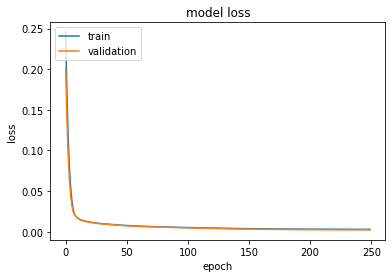

In [11]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#a=model.predict(df_01_05_15_results_inputs_scaled1)
#scaler_y.inverse_transform(a)

array([[ 92.68931 ,  75.20591 , 562.8004  , 192.12563 ],
       [ 79.21683 ,  70.09466 , 614.07263 , 180.41298 ],
       [ 97.3393  ,  76.18681 , 644.54694 , 193.49977 ],
       [ 72.662476,  79.57008 , 814.09125 , 154.11565 ],
       [ 94.261894,  71.04864 , 506.5745  , 195.1996  ],
       [ 93.24195 ,  83.22248 , 702.7843  , 188.23328 ],
       [ 87.01631 ,  79.02677 , 614.42596 , 166.9139  ],
       [ 87.42415 ,  77.06194 , 558.68445 , 192.44473 ],
       [ 90.990715,  74.8249  , 550.2379  , 189.71843 ],
       [ 89.75087 ,  74.27133 , 542.053   , 187.76175 ],
       [ 92.553795,  75.178345, 557.3812  , 192.34453 ],
       [ 79.59551 ,  69.79492 , 612.1514  , 181.21576 ],
       [ 97.15341 ,  76.36309 , 646.17993 , 193.14886 ],
       [ 73.92688 ,  78.46273 , 804.713   , 156.38695 ],
       [ 93.69009 ,  71.42945 , 511.9131  , 194.12383 ],
       [ 93.829605,  83.15869 , 705.6896  , 189.2457  ],
       [ 87.56672 ,  79.22599 , 618.425   , 168.20529 ],
       [ 88.13339 ,  76.58597 ,

In [13]:
#prediction for 1, 5, and 15 percent deviated inputs from backward model
ynew1= model.predict(X_test1)
#below is to predict for 1, 5, and 15% deviation inputs
#ynew1_1_05_15= model.predict(df_01_05_15_results_inputs_scaled1)
#ynew1_1_05_15
#ynew1_05_15=scaler_y.inverse_transform(ynew1_1_05_15)
#ynew1_05_15
#df_ predicted_output_01_05_15= pd.DataFrame(data=ynew1_05_15)
#df1515_predicted = pd.DataFrame(data=ynew1_05_15, columns=["Ft","Fn","P", "T"])
#from google.colab import files
#df22225454.to_excel('df_01_05_15_forward_predicted.xlsx')
#files.download('df_01_05_15_forward_predicted.xlsx')
#df22225454.iloc[9:25, 1:2]
#referense
#df1515_predicted.iloc[10:20, 0:1]
#df_01_05_15_results_outputs


#prediction for 20 percent deviation
#ynew1_20= model.predict(df_20_results_inputs_scaled)
#ynew20=scaler_y.inverse_transform(ynew1_20)
#ynew20
#df_20_predicted=pd.DataFrame(data=ynew20, columns=['Ft','Fn','P','T'])
#df_20_predicted
#from google.colab import files
#df_20_predicted.to_excel('df_20_predicted.xlsx')
#files.download('df_20_predicted.xlsx')


##prediction for 10 25 percent deviation
#ynew1_10_25= model.predict(df_10_25_results_inputs_scaled)
#ynew10_25=scaler_y.inverse_transform(ynew1_10_25)
#ynew10_25
#df_10_25_predicted=pd.DataFrame(data=ynew10_25, columns=['Ft','Fn','P','T'])
#df_10_25_predicted
#from google.colab import files
#df_10_25_predicted.to_excel('df_10_25_predicted.xlsx')
#files.download('df_10_25_predicted.xlsx')



In [ ]:
# to download the df_20_results dataset and compute mape with df_20_predicted dataset
df_20_results = pd.read_excel('/content/gdrive/My Drive/PhD with Dr Anahita/projects/chatter/df_20_results.xlsx')
df_20_results.columns=['A','B','c','n','m','h','Ft','Fn','P','T']
df_20_results_only_outputs=df_20_results[['Ft','Fn','P','T']]
np.mean(abs(df_20_results_only_outputs.iloc[0:10, 3:4].to_numpy()-df_20_predicted.iloc[0:10, 3:4].to_numpy())/df_20_results_only_outputs.iloc[0:10, 3:4].to_numpy()*100)


1.4991371038386219

In [ ]:
df444 = pd.read_excel('/content/gdrive/My Drive/PhD with Dr Anahita/projects/chatter/df4.xlsx')
df444.columns = ['t','FEA','FEA','FEA','FEA','FEA','FEA','FEA','FEA','FEA','FEA','ten','ten','ten','ten','ten','ten','ten','ten','ten','ten','tfive','tfive','tfive','tfive','tfive','tfive','tfive','tfive','tfive','tfive']
df4445=df444.T
df4445.columns=['Ft','Fn','P','T']
df4445
#df4445.iloc[0:1, 0:1]
#df4445.drop[0:1, axis=0]
df4445=df4445.drop(['t'])
df4445.iloc[0:10, 0:1].to_numpy()
df4445


,Ft,Fn,P,T
FEA,125.433,83.982,1003.47,322.145
FEA,97.9602,73.3427,783.682,273.915
FEA,125.818,78.4145,1006.54,314.992
FEA,119.009,93.6906,952.069,327.104
FEA,106.134,72.8844,849.071,281.632
FEA,119.261,73.2355,954.088,299.698
FEA,131.48,81.9317,1051.84,330.808
FEA,117.85,83.5403,942.802,318.705
FEA,125.914,84.1501,1007.31,330.258
FEA,128.261,88.2943,1026.09,339.054


In [ ]:
np.mean(abs(df4445.iloc[0:10, 3:4].to_numpy()-df4445.iloc[20:30, 3:4].to_numpy())/df4445.iloc[0:10, 3:4].to_numpy()*100)

1.0108693021801793

In [14]:
ynew = scaler_y.inverse_transform(ynew1) 
y_test=scaler_y.inverse_transform(y_test1) 


In [15]:
mse_FT=np.mean((y_test[:,0].reshape(300,1)- ynew[:,0].reshape(300,1))**2)
r_value_FT=r2_score(y_test[:,0].reshape(300,1), ynew[:,0].reshape(300,1))
Rmse_FT=sqrt(mean_squared_error(y_test[:,0].reshape(300,1), ynew[:,0].reshape(300,1)))
print("mse_FT:",mse_FT )
print("r_squared_FT:",r_value_FT )
#np.mean(abs(y_test[:,0].reshape(300,1)-ynew[:,0].reshape(300,1))/df4445.iloc[0:10, 3:4].to_numpy()*100)
print('Ft Mape:', np.std(abs((y_test[:,0].reshape(300,1)-ynew[:,0].reshape(300,1))/y_test[:,0].reshape(300,1))*100))
print('Fn Mape:', np.std(abs((y_test[:,1].reshape(300,1)-ynew[:,1].reshape(300,1))/y_test[:,1].reshape(300,1))*100))
print('P Mape:', np.std(abs((y_test[:,2].reshape(300,1)-ynew[:,2].reshape(300,1))/y_test[:,2].reshape(300,1))*100))
print('T Mape:', np.std(abs((y_test[:,3].reshape(300,1)-ynew[:,3].reshape(300,1))/y_test[:,3].reshape(300,1))*100))
print('Ft CI', )



mse_FT: 12.916776594630734
r_squared_FT: 0.928113326811829
Ft Mape: 1.9354956437183761
Fn Mape: 3.0307814932748847
P Mape: 1.9978905611443045
T Mape: 2.744648301935659
Ft CI


In [ ]:
a = range(10,14)
mean_confidence_interval(a)

NameError: ignored

In [ ]:
# to calculate the MAPE of forward model multivariate vs univariate
#Ft Mape: 1.8258244346945924
#Fn Mape: 2.3235874400894945
#P Mape: 1.8923191315443009
#T Mape: 2.3041402135459066
#std 
#Ft : 2.0776245367199793
#Fn : 3.034701223900676
#P : 2.159217714377859
#T  2.84170767742113
#univariate
#Ft Mape: 1.9780514862965781
#Fn Mape: 2.108305489102834
#P 2.03593219654611
#2.5171358324890565
#std
#ft 2.096629050535722
#Fn  3.5734427581234978
# P 2.8380448895572687
#T 3.3153570611841987


In [ ]:
# to calculate MSE
#mse_FN=np.mean((y_test[:,1].reshape(300,1)- ynew[:,1].reshape(300,1))**2)
#to calculate RMSE
Rmse_FN=sqrt(mean_squared_error(y_test[:,1].reshape(300,1), ynew[:,1].reshape(300,1)))
r_value_FN=r2_score(y_test[:,1].reshape(300,1), ynew[:,1].reshape(300,1))
print("Rmse_FN:",Rmse_FN )
print("r_squared_FT:",r_value_FN )


Rmse_FN: 3.1529060430015634
r_squared_FT: 0.875696306886373


In [ ]:
Rmse_P=sqrt(mean_squared_error(y_test[:,2].reshape(300,1), ynew[:,2].reshape(300,1)))
r_value_P=r2_score(y_test[:,2].reshape(300,1), ynew[:,2].reshape(300,1))
print("mse_FT:",Rmse_P )
print("r_squared_FT:",r_value_P )

mse_FT: 29.99297220492891
r_squared_FT: 0.9217732796015162


In [ ]:
Rmse_T=sqrt(mean_squared_error(y_test[:,3].reshape(300,1), ynew[:,3].reshape(300,1)))
r_value_T=r2_score(y_test[:,3].reshape(300,1), ynew[:,3].reshape(300,1))
print("Rmse_T:",Rmse_T )
print("r_squared_FT:",r_value_T )


Rmse_T: 11.038377723580421
r_squared_FT: 0.8102570311112924


In [ ]:
#X_train2, X_test2, y_train2, y_test2 = train_test_split(yscale1,xscale1, test_size=.3, random_state=45)


In [ ]:
comm='''
model1 = Sequential()
model1.add(Dense(10, input_dim=4, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model1.add(Dense(20,kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model1.add(Dense(6,kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='linear'))
model1.summary()
'''

In [ ]:
#model1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [ ]:
#>>> history = model1.fit(y_train1, X_train1 ,epochs=250, batch_size=50, verbose=1,validation_split=0.3, callbacks=EarlyStopping(monitor='val_loss', verbose=1,patience=15))

In [ ]:
#ynew2= model1.predict(y_test1)
#ynew2.shape

In [ ]:
#ynew11 = scaler_x.inverse_transform(ynew2) 
#y_test11=scaler_x.inverse_transform(y_test2) 

In [ ]:
comm=''' 
mse_A=np.mean((y_test11[:,0].reshape(300,1)- ynew11[:,0].reshape(300,1))**2)
r_value_A=r2_score(y_test11[:,0].reshape(300,1), ynew11[:,0].reshape(300,1))
print("mse_FT:",mse_A )
print("r_squared_FT:",r_value_A )
'''

In [ ]:
#r2_score(y_test11[:,1].reshape(300,1), ynew11[:,1].reshape(300,1))

In [ ]:
#r2_score(y_test11[:,2].reshape(300,1), ynew11[:,2].reshape(300,1))

In [ ]:
#r2_score(y_test11[:,3].reshape(300,1), ynew11[:,3].reshape(300,1))

In [ ]:
#r2_score(y_test11[:,4].reshape(300,1), ynew11[:,4].reshape(300,1))

In [ ]:
#r2_score(y_test11[:,5].reshape(300,1), ynew11[:,5].reshape(300,1))